In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Bidirectional
from keras.layers import Flatten,BatchNormalization
from keras.layers import Dropout,Conv1D,MaxPooling1D,LSTM
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
data=pd.read_csv("emotions.csv")

In [3]:
data.shape

(2132, 2549)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [5]:
data.isna().sum().sum()

0

In [6]:
data['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [7]:
data_new= pd.get_dummies(data, columns = ['label'])


In [8]:
data_new

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label_NEGATIVE,label_NEUTRAL,label_POSITIVE
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,1,0,0
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,0,1,0
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,0,0,1
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,0,0,1
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,0,1,0
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,0,0,1
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,1,0,0
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,1,0,0


In [9]:
X=data_new.loc[:,'# mean_0_a':'fft_749_b']
X.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


In [10]:
y=data_new.loc[:,'label_NEGATIVE':'label_POSITIVE']
y.head()

,label_NEGATIVE,label_NEUTRAL,label_POSITIVE
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [11]:
X=X.values
y=y.values

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [14]:
X_train.shape

(1279, 2548)

In [38]:
#final model


model = Sequential()
input_shape=(X_train.shape[1], 1)

model.add(Conv1D(64, kernel_size=5,activation='relu', input_shape=input_shape))
model.add(Conv1D(32,kernel_size=5, activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(32,kernel_size=3, activation='relu'))
# model.add(Conv1D(16,kernel_size=3, activation='relu'))
model.add(MaxPooling1D())

model.add(Bidirectional(LSTM(64, return_sequences=True)))
# model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
# model.add(Bidirectional(LSTM(32,activation="sigmoid")))

# model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(3, activation='softmax'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 2544, 64)          384       
                                                                 
 conv1d_15 (Conv1D)          (None, 2540, 32)          10272     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 1270, 32)         0         
 1D)                                                             
                                                                 
 conv1d_16 (Conv1D)          (None, 1268, 32)          3104      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 634, 32)          0         
 1D)                                                             
                                                                 
 bidirectional_8 (Bidirectio  (None, 634, 128)        

In [24]:
#try

model = Sequential()
input_shape=(X_train.shape[1], 1)

model.add(Conv1D(64, kernel_size=5,activation='relu', input_shape=input_shape))
model.add(Conv1D(32,kernel_size=5, activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(32,kernel_size=3, activation='relu'))
model.add(Conv1D(32,kernel_size=3, activation='relu'))
model.add(MaxPooling1D())

model.add(Bidirectional(LSTM(64,activation="sigmoid",return_sequences=True)))
model.add(Dropout(0.5))
# model.add(Bidirectional(LSTM(32,activation="sigmoid",return_sequences=False)))
# model.add(Dropout(0.5)) 

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Activation('relu'))

model.add(Dense(3, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 2544, 64)          384       
                                                                 
 conv1d_8 (Conv1D)           (None, 2540, 32)          10272     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1270, 32)         0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 1268, 32)          3104      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 634, 32)          0         
 1D)                                                             
                                                                 
 bidirectional_2 (Bidirectio  (None, 634, 128)        

In [39]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
history=model.fit(X_train, y_train,
          batch_size=50,
          epochs=35,  
          verbose=1,validation_data=(X_test,y_test))

Epoch 1/35
26/26 [==============================] - 43s 1s/step - loss: 0.9767 - accuracy: 0.4777 - val_loss: 0.5981 - val_accuracy: 0.8912
Epoch 2/35
26/26 [==============================] - 41s 2s/step - loss: 0.6034 - accuracy: 0.7482 - val_loss: 0.2649 - val_accuracy: 0.9306
Epoch 3/35
26/26 [==============================] - 42s 2s/step - loss: 0.4595 - accuracy: 0.8131 - val_loss: 0.2375 - val_accuracy: 0.9343
Epoch 4/35
26/26 [==============================] - 43s 2s/step - loss: 0.4492 - accuracy: 0.8303 - val_loss: 0.2020 - val_accuracy: 0.9306
Epoch 5/35
26/26 [==============================] - 41s 2s/step - loss: 0.3514 - accuracy: 0.8647 - val_loss: 0.1938 - val_accuracy: 0.9325
Epoch 6/35
26/26 [==============================] - 41s 2s/step - loss: 0.3618 - accuracy: 0.8640 - val_loss: 0.2028 - val_accuracy: 0.9343
Epoch 7/35
26/26 [==============================] - 42s 2s/step - loss: 0.3192 - accuracy: 0.8757 - val_loss: 0.1821 - val_accuracy: 0.9362
Epoch 8/35
26/26 [==

In [41]:
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
print("Train Accuracy: {:.3f}%".format(train_acc * 100))

Train Accuracy: 95.700%


In [42]:
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(test_acc * 100))

Test Accuracy: 93.996%


In [43]:
val_acc = model.evaluate(X_val, y_val, verbose=0)[1]
print("Validation Accuracy: {:.3f}%".format(val_acc * 100))

Validation Accuracy: 95.000%


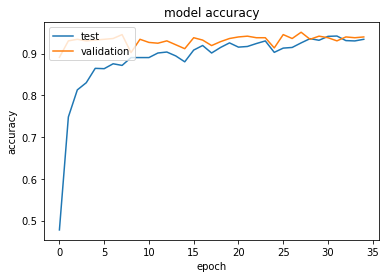

In [44]:

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['test', 'validation'], loc='upper left')

plt.show()

In [45]:
y_pred=model.predict(X_test)

In [46]:
y_pred

array([[1.03481107e-13, 1.00000000e+00, 7.07638703e-09],
       [7.72396063e-14, 1.00000000e+00, 5.86945204e-09],
       [9.14998472e-01, 1.12473332e-04, 8.48890468e-02],
       ...,
       [1.00982224e-13, 1.00000000e+00, 6.93663216e-09],
       [8.20815206e-01, 7.94673746e-04, 1.78390205e-01],
       [1.62990295e-06, 2.56275342e-07, 9.99998093e-01]], dtype=float32)

In [47]:
y_test

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [48]:
y_test[1]

array([0, 1, 0], dtype=uint8)

In [49]:
y_pred[1]

array([7.7239606e-14, 1.0000000e+00, 5.8694520e-09], dtype=float32)

In [50]:
y_test1=np.argmax(y_test, axis=1)

In [51]:
y_test1

array([1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0,

In [52]:
y_pred1=np.argmax(y_pred,axis=1)

In [53]:
y_pred1

array([1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1,
       2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2,
       2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0,

In [54]:
y_test1[12]

0

In [55]:
y_pred1[12]

0

In [56]:
confusion_matrix(y_test1,y_pred1)

array([[173,   0,   6],
       [  1, 175,   2],
       [ 22,   1, 153]], dtype=int64)

In [57]:
print("classification_report\n",classification_report(y_test1,y_pred1))

classification_report
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       179
           1       0.99      0.98      0.99       178
           2       0.95      0.87      0.91       176

    accuracy                           0.94       533
   macro avg       0.94      0.94      0.94       533
weighted avg       0.94      0.94      0.94       533



In [58]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test,y_pred,multi_class='ovo')

In [59]:
auc

0.9909766082025916

In [60]:
df_test = pd.DataFrame(y_test, columns = ['label_NEGATIVE','label_NEUTRAL','label_POSITIVE'])

In [61]:
df_pred = pd.DataFrame(y_pred, columns = ['label_NEGATIVE','label_NEUTRAL','label_POSITIVE'])

In [62]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(df_test['label_NEGATIVE'], df_pred['label_NEGATIVE'])

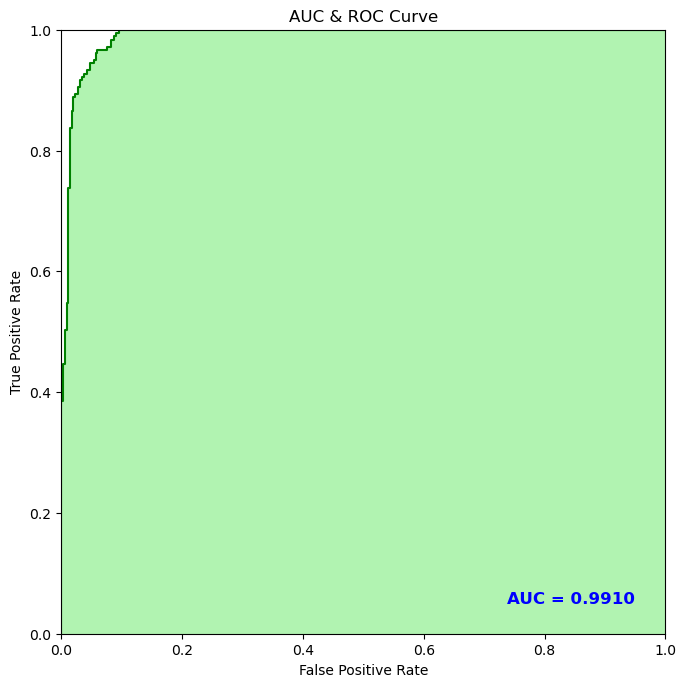

In [63]:
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


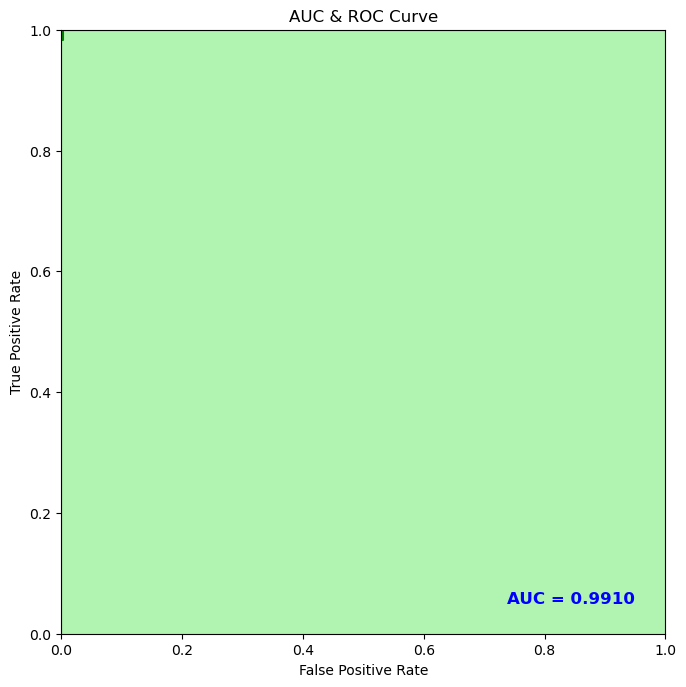

In [64]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(df_test['label_NEUTRAL'], df_pred['label_NEUTRAL'])
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

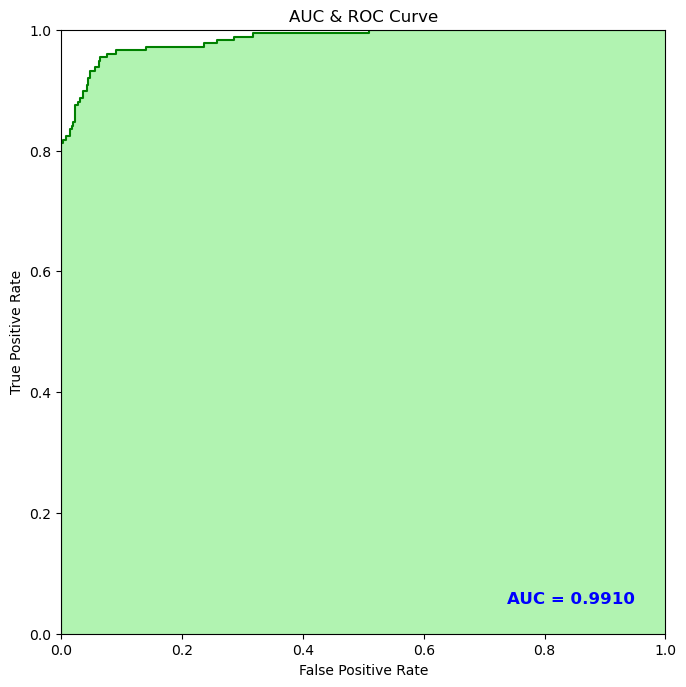

In [65]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(df_test['label_POSITIVE'], df_pred['label_POSITIVE'])
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()